In [15]:
def convertir_a_3D(x,y):
    return (x,y,0)

punto_3D = convertir_a_3D(1,2)
print("Punto en 3D:", punto_3D)

Punto en 3D: (1, 2, 0)


In [ ]:
Reto: Modifica la funcion para aceptar una lista de funcion

In [17]:
def convertir_a_3D(puntos_2D):
    # Recorre cada par (x, y) y devuelve una lista de tuplas (x, y, 0)
    return [(x, y, 0) for x, y in puntos_2D]

# Lista de puntos 2D
puntos = [(1, 2), (3, 4), (5, 6)]

# Llamada a la función para convertirlos a 3D
puntos_3D = convertir_a_3D(puntos)

# Mostrar el resultado
print("Puntos en 3D:", puntos_3D)

Puntos en 3D: [(1, 2, 0), (3, 4, 0), (5, 6, 0)]


In [ ]:
Ejercicio 1 - Crear una matriz de transformacion homogenea, genera una transformacion que represente una traslacion de
(3,2,1) y una rotacion de 90

In [8]:
import numpy as np

def matriz_transformacion(tx, ty, tz, Rz_deg):
    theta = np.radians(Rz_deg)
    
    # Matriz de rotación alrededor del eje Z
    Rz = np.array([[np.cos(theta), -np.sin(theta), 0],
                   [np.sin(theta), np.cos(theta), 0],
                   [0, 0, 1]])
    
    # Matriz de transformación homogénea (4x4)
    T = np.array([[1, 0, 0, tx],
                 [0, 1, 0, ty],
                 [0, 0, 1, tz],
                 [0, 0, 0, 1]]) 
    return T
T = matriz_transformacion(3, 2, 1, 90)
print(T)


[[1 0 0 3]
 [0 1 0 2]
 [0 0 1 1]
 [0 0 0 1]]


In [ ]:
Reto: Cambia el codigo para aceptar rotaciones en X, Y, y Z.

In [9]:
import numpy as np

def matriz_transformacion(tx, ty, tz, Rx_deg, Ry_deg, Rz_deg):
    # Convertir los ángulos de grados a radianes
    Rx = np.radians(Rx_deg)
    Ry = np.radians(Ry_deg)
    Rz = np.radians(Rz_deg)
    
    # Matriz de rotación en X
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(Rx), -np.sin(Rx)],
        [0, np.sin(Rx), np.cos(Rx)]
    ])
    
    # Matriz de rotación en Y
    R_y = np.array([
        [np.cos(Ry), 0, np.sin(Ry)],
        [0, 1, 0],
        [-np.sin(Ry), 0, np.cos(Ry)]
    ])
    
    # Matriz de rotación en Z
    R_z = np.array([
        [np.cos(Rz), -np.sin(Rz), 0],
        [np.sin(Rz),  np.cos(Rz), 0],
        [0, 0, 1]
    ])
    
    # Rotación compuesta (Z * Y * X)
    R = R_z @ R_y @ R_x
    
    # Matriz de transformación homogénea (4x4)
    T = np.array([
        [R[0,0], R[0,1], R[0,2], tx],
        [R[1,0], R[1,1], R[1,2], ty],
        [R[2,0], R[2,1], R[2,2], tz],
        [0, 0, 0, 1]
    ])
    
    # Redondear a 3 decimales para una salida limpia
    T = np.round(T, 3)
    
    return T
T = matriz_transformacion(3, 2, 1, 0, 0, 90)
print("Matriz de transformación homogénea:")
print(T)


Matriz de transformación homogénea:
[[ 0. -1.  0.  3.]
 [ 1.  0.  0.  2.]
 [ 0.  0.  1.  1.]
 [ 0.  0.  0.  1.]]


In [ ]:
Ejercicio - 2: Aplicar una transformacion a un punto. Transforma el punto (1, 0, 0) usando la matriz homogenea del ejercicio anterior

In [10]:
punto = np.array([1, 0, 0, 1]) #Coordenadas homogeneas
punto_transformado = T @ punto #MULTIPLICACION DE MATRICES
print("Punto transformado", punto_transformado[:3])

Punto transformado [3. 3. 1.]


In [ ]:
Reto: Aplica varias transformaciones encadenadas

In [11]:
import numpy as np

def matriz_transformacion(tx, ty, tz, Rx_deg, Ry_deg, Rz_deg):
    # Convertir grados a radianes
    Rx = np.radians(Rx_deg)
    Ry = np.radians(Ry_deg)
    Rz = np.radians(Rz_deg)

    # Rotación en X
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(Rx), -np.sin(Rx)],
        [0, np.sin(Rx), np.cos(Rx)]
    ])
    # Rotación en Y
    R_y = np.array([
        [np.cos(Ry), 0, np.sin(Ry)],
        [0, 1, 0],
        [-np.sin(Ry), 0, np.cos(Ry)]
    ])
    # Rotación en Z
    R_z = np.array([
        [np.cos(Rz), -np.sin(Rz), 0],
        [np.sin(Rz), np.cos(Rz), 0],
        [0, 0, 1]
    ])
    
    # Rotación total
    R = R_z @ R_y @ R_x

    # Matriz homogénea
    T = np.array([
        [R[0,0], R[0,1], R[0,2], tx],
        [R[1,0], R[1,1], R[1,2], ty],
        [R[2,0], R[2,1], R[2,2], tz],
        [0, 0, 0, 1]
    ])
    return np.round(T, 3)

#TRANSFORMACIONES INDIVIDUALES
#Primera transformación: rotar 90° en Z y trasladar (3, 2, 1)
T1 = matriz_transformacion(3, 2, 1, 0, 0, 90)

#Segunda transformación: rotar 45° en X y trasladar (0, 0, 2)
T2 = matriz_transformacion(0, 0, 2, 45, 0, 0)

#Tercera transformación: rotar 30° en Y y trasladar (-1, 1, 0)
T3 = matriz_transformacion(-1, 1, 0, 0, 30, 0)

#TRANSFORMACIÓN TOTAL (encadenada)
T_total = T3 @ T2 @ T1

print("Matriz de transformación encadenada:")
print(np.round(T_total, 3))

#Aplicar al punto
punto = np.array([1, 0, 0, 1])
punto_transformado = T_total @ punto

print("\nPunto original:", punto[:3])
print("Punto transformado final:", np.round(punto_transformado[:3], 3))


Matriz de transformación encadenada:
[[ 0.354 -0.866  0.354  3.658]
 [ 0.707  0.    -0.707  1.707]
 [ 0.612  0.5    0.612  2.069]
 [ 0.     0.     0.     1.   ]]

Punto original: [1 0 0]
Punto transformado final: [4.012 2.414 2.681]


In [ ]:
Generar una matriz de rotacion de 90 grados al rededor del eje z y aplicala a un punto (2,0,0)

In [18]:
import numpy as np
# Crear una matriz de rotación de 90° alrededor del eje Z
# Convertimos 90° a radianes, ya que las funciones trigonométricas de NumPy usan radianes
theta = np.radians(90)

# Definimos la matriz de rotación en Z (rotación antihoraria en el plano XY)
Rz = np.array([
    [np.cos(theta), -np.sin(theta), 0],  # Primera fila
    [np.sin(theta),  np.cos(theta), 0],  # Segunda fila
    [0,              0,             1]   # Tercera fila (el eje Z no cambia)
])
# Definir el punto a rotar
# ------------------------------
punto = np.array([2, 0, 0])  # Punto en el espacio (x=2, y=0, z=0)

# Aplicar la rotación
punto_rotado = Rz @ punto  # Multiplicamos la matriz de rotación por el vector
# Mostrar resultados
print("Matriz de rotación (90° alrededor del eje Z):\n", np.round(Rz, 3))
print("\nPunto original:", punto)
print("Punto rotado:", np.round(punto_rotado, 3))

Matriz de rotación (90° alrededor del eje Z):
 [[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]

Punto original: [2 0 0]
Punto rotado: [0. 2. 0.]


Vector de posición original: [3 4 0]

Matriz de rotación Rz (45° alrededor del eje Z):
 [[ 0.707 -0.707  0.   ]
 [ 0.707  0.707  0.   ]
 [ 0.     0.     1.   ]]

Vector rotado: [-0.707  4.95   0.   ]


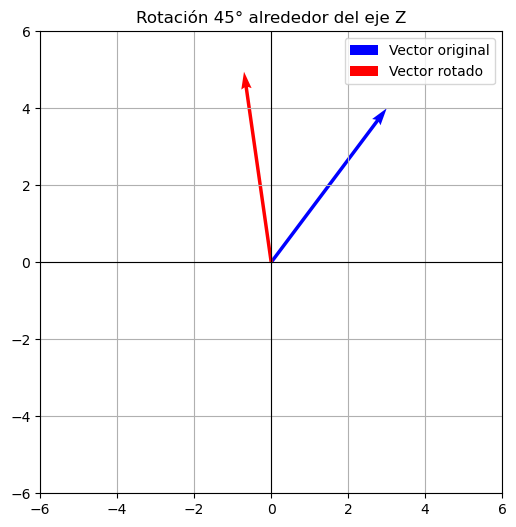

In [20]:
import numpy as np                 # Para operaciones matemáticas y matrices
import matplotlib.pyplot as plt    # Para graficar

#Vector de posición inicial
posicion = np.array([3, 4, 0])
print("Vector de posición original:", posicion)

#Definir el ángulo de rotación (45° a radianes)
theta = np.radians(45)  # np.radians convierte grados a radianes

#Crear la matriz de rotación alrededor del eje Z
Rz = np.array([
    [np.cos(theta), -np.sin(theta), 0], 
    [np.sin(theta),  np.cos(theta), 0],
    [0,              0,             1]
])
print("\nMatriz de rotación Rz (45° alrededor del eje Z):\n", np.round(Rz, 3))

#Aplicar la rotación al vector original
nueva_orientacion = Rz @ posicion  # equivalente a np.dot(Rz, posicion)
print("\nVector rotado:", np.round(nueva_orientacion, 3))

#Representar gráficamente los vectores
plt.figure(figsize=(6,6))
plt.axhline(0, color="black", linewidth=0.8)  # eje X
plt.axvline(0, color="black", linewidth=0.8)  # eje Y

# Vector original (azul)
plt.quiver(0, 0, posicion[0], posicion[1],
           angles='xy', scale_units='xy', scale=1,
           color='blue', label='Vector original')

# Vector rotado (rojo)
plt.quiver(0, 0, nueva_orientacion[0], nueva_orientacion[1],
           angles='xy', scale_units='xy', scale=1,
           color='red', label='Vector rotado')

# Configuración de los ejes y título
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Rotación 45° alrededor del eje Z")
plt.grid(True)
plt.show()

In [ ]:
Ejericicio 3 - Inversa de una transformacion homogenea. Calcular la inversa de T y verificar que T*T(-1) sea la matriz identidad

In [14]:
import numpy as np
# FUNCIÓN: inversa(T)
# Calcula la inversa de una matriz de transformación homogénea 4x4
def inversa(T):
    # Extraer la submatriz de rotación (las primeras 3 filas y 3 columnas)
    R = T[0:3, 0:3]
    
    # Extraer el vector de traslación (última columna, sin incluir la última fila)
    P = T[0:3, 3]
    
    # Crear una matriz identidad 4x4 (base para construir la inversa)
    T_inv = np.eye(4)
    
    # La parte de rotación de la inversa es la transpuesta de la rotación original (R^T)
    T_inv[0:3, 0:3] = R.T
    
    # La parte de traslación de la inversa es -R^T * P
    # Esto "revierte" el desplazamiento en el nuevo sistema de coordenadas
    T_inv[0:3, 3] = -R.T @ P
    
    # Retornar la matriz inversa homogénea
    return T_inv

# Creamos una matriz de transformación homogénea T (rotación + traslación)
T = np.array([
    [0, -1, 0, 3],   # Rotación + desplazamiento en x
    [1,  0, 0, 2],   # Rotación + desplazamiento en y
    [0,  0, 1, 1],   # Sin rotación en z, desplazamiento en z
    [0,  0, 0, 1]    # Última fila fija en las transformaciones homogéneas
])

# Calcular la inversa de T
T_inv = inversa(T)

# Mostrar la matriz inversa
print("Inversa de T:\n", T_inv)

# Verificar que T * T_inv sea aproximadamente la matriz identidad
print("\nProducto T * T_inv (debe ser identidad):\n", np.round(T @ T_inv, 6))


Inversa de T:
 [[ 0.  1.  0. -2.]
 [-1.  0.  0.  3.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  1.]]

Producto T * T_inv (debe ser identidad):
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
Reto: Implementar esta funcion para un conjunto de transformaciones almacenadas en una lista

In [22]:
import numpy as np
# FUNCIÓN: inversa(T)
# Calcula la inversa de una matriz de transformación homogénea 4x4

def inversa(T):
    # Extraer la submatriz de rotación (3x3)
    R = T[0:3, 0:3]
    
    # Extraer el vector de traslación (columna 4, sin la última fila)
    P = T[0:3, 3]
    
    # Crear matriz identidad 4x4 (base)
    T_inv = np.eye(4)
    
    # R^T es la rotación inversa
    T_inv[0:3, 0:3] = R.T
    
    # -R^T * P revierte la traslación
    T_inv[0:3, 3] = -R.T @ P
    
    return T_inv

# CONJUNTO DE TRANSFORMACIONES HOMOGÉNEAS (lista)
transformaciones = [
    np.array([[0, -1, 0, 3],
              [1,  0, 0, 2],
              [0,  0, 1, 1],
              [0,  0, 0, 1]]),

    np.array([[1, 0, 0, 4],
              [0, 1, 0, -2],
              [0, 0, 1, 0],
              [0, 0, 0, 1]]),

    np.array([[0, 0, 1, 0],
              [0, 1, 0, 5],
              [-1, 0, 0, 2],
              [0, 0, 0, 1]])
]
# APLICAR LA FUNCIÓN INVERSA A CADA MATRIZ EN LA LISTA
inversas = []  # Lista vacía para guardar las matrices inversas

for i, T in enumerate(transformaciones):
    T_inv = inversa(T)            # Calcular la inversa de la matriz actual
    inversas.append(T_inv)        # Guardarla en la lista
    print(f"\n Transformación {i+1}:\n", T)
    print(f" Inversa {i+1}:\n", np.round(T_inv, 3))
    print(f" Verificación T * T_inv ≈ I:\n", np.round(T @ T_inv, 3))
    
#Mostrar todas las inversas al final
print("\n===== TODAS LAS INVERSAS =====")
for i, T_inv in enumerate(inversas):
    print(f"\nInversa {i+1}:\n{np.round(T_inv, 3)}")



 Transformación 1:
 [[ 0 -1  0  3]
 [ 1  0  0  2]
 [ 0  0  1  1]
 [ 0  0  0  1]]
 Inversa 1:
 [[ 0.  1.  0. -2.]
 [-1.  0.  0.  3.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  1.]]
 Verificación T * T_inv ≈ I:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

 Transformación 2:
 [[ 1  0  0  4]
 [ 0  1  0 -2]
 [ 0  0  1  0]
 [ 0  0  0  1]]
 Inversa 2:
 [[ 1.  0.  0. -4.]
 [ 0.  1.  0.  2.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
 Verificación T * T_inv ≈ I:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

 Transformación 3:
 [[ 0  0  1  0]
 [ 0  1  0  5]
 [-1  0  0  2]
 [ 0  0  0  1]]
 Inversa 3:
 [[ 0.  0. -1.  2.]
 [ 0.  1.  0. -5.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]
 Verificación T * T_inv ≈ I:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

===== TODAS LAS INVERSAS =====

Inversa 1:
[[ 0.  1.  0. -2.]
 [-1.  0.  0.  3.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  1.]]

Inversa 2:
[[ 1.  0.  0. -4.]
 [ 0.  1.  0.  2.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

